# Bounding box detection - Racoon data


## Data files
- images_racoon.rar: contain images of racoons
- train_labels.cv: contains coordinates for bounding box for every image

### Import the necessary libraries

In [1]:
import pandas as pd
import cv2
import numpy as np

### Change directory

In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [21]:
%cd /content/drive/My Drive/AI/Labs/ACV Lab/ACV Lab/

/content/drive/My Drive/AI/Labs/ACV Lab/ACV Lab


### Load the training data from train.csv file

In [22]:
tr_df = pd.read_csv('train_labels.csv')
tr_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,raccoon-17.jpg,259,194,raccoon,95,60,167,118
1,raccoon-11.jpg,660,432,raccoon,3,1,461,431
2,raccoon-63.jpg,600,400,raccoon,74,107,280,290
3,raccoon-63.jpg,600,400,raccoon,227,93,403,298
4,raccoon-60.jpg,273,185,raccoon,58,33,197,127


### Print the shape of the train dataset

In [23]:
tr_df.shape

(173, 8)

### Declare a variable IMAGE_SIZE = 128 as we will be using MobileNet which will be taking Input shape as 128 * 128 

In [24]:
Image_Size=128

### With the help of csv.reader write a for loop which can load the train.csv file and store the path, width, height, x0,y0,x1,y1 in induvidual variables. <br>
1. Create a list variable known as 'path' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be downsampled to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 128 * 128 

In [104]:
import csv
with open('train_labels.csv',"r") as csvfile:
  paths=[]
  #print(sum(1 for line in csvfile))
  coords = np.zeros((sum(1 for line in csvfile)-1,4))
  reader = csv.reader(csvfile,delimiter=',')
  csvfile.seek(0)
  next(reader,None)
  for i,col in enumerate(reader):
    #print(col[i])
    for j,r in enumerate(col):
      #print(j,r)
      if ((j != 0) & (j != 3)):
        col[j] = int(r)
    #print(col)
    path,w,h,cls_,x0,y0,x1,y1 = col
    #print(path,width,height,x0,y0,x1,y1)
    paths.append(path)  
    coords[i,0] = x0 * Image_Size / w
    coords[i,1] = y0 * Image_Size / h
    coords[i,2] = x1 * Image_Size / w
    coords[i,3] = y1 * Image_Size / h

In [105]:
coords

array([[4.69498069e+01, 3.95876289e+01, 8.25328185e+01, 7.78556701e+01],
       [5.81818182e-01, 2.96296296e-01, 8.94060606e+01, 1.27703704e+02],
       [1.57866667e+01, 3.42400000e+01, 5.97333333e+01, 9.28000000e+01],
       [4.84266667e+01, 2.97600000e+01, 8.59733333e+01, 9.53600000e+01],
       [2.71941392e+01, 2.28324324e+01, 9.23663004e+01, 8.78702703e+01],
       [7.49268293e+00, 5.72357724e+00, 1.17385366e+02, 1.24878049e+02],
       [2.53866667e+01, 6.72000000e+00, 7.85066667e+01, 1.27680000e+02],
       [5.24750958e+01, 6.63212435e+00, 1.22114943e+02, 1.10093264e+02],
       [5.14056225e-01, 6.33663366e-01, 7.91646586e+01, 1.11524752e+02],
       [4.29961390e+01, 5.27835052e+00, 8.99459459e+01, 5.87216495e+01],
       [1.30957096e+01, 4.62650602e+00, 8.32211221e+01, 1.25686747e+02],
       [8.40154440e+00, 2.57319588e+01, 1.18115830e+02, 9.69896907e+01],
       [4.35200000e+00, 3.12320000e+01, 7.14240000e+01, 1.27744000e+02],
       [6.83333333e+00, 6.66666667e-01, 1.13833333e

In [78]:
paths

['raccoon-17.jpg',
 'raccoon-11.jpg',
 'raccoon-63.jpg',
 'raccoon-63.jpg',
 'raccoon-60.jpg',
 'raccoon-69.jpg',
 'raccoon-180.jpg',
 'raccoon-200.jpg',
 'raccoon-141.jpg',
 'raccoon-19.jpg',
 'raccoon-84.jpg',
 'raccoon-124.jpg',
 'raccoon-182.jpg',
 'raccoon-111.jpg',
 'raccoon-91.jpg',
 'raccoon-79.jpg',
 'raccoon-93.jpg',
 'raccoon-20.jpg',
 'raccoon-42.jpg',
 'raccoon-139.jpg',
 'raccoon-58.jpg',
 'raccoon-71.jpg',
 'raccoon-183.jpg',
 'raccoon-1.jpg',
 'raccoon-169.jpg',
 'raccoon-82.jpg',
 'raccoon-4.jpg',
 'raccoon-101.jpg',
 'raccoon-10.jpg',
 'raccoon-166.jpg',
 'raccoon-184.jpg',
 'raccoon-38.jpg',
 'raccoon-120.jpg',
 'raccoon-142.jpg',
 'raccoon-149.jpg',
 'raccoon-51.jpg',
 'raccoon-43.jpg',
 'raccoon-123.jpg',
 'raccoon-66.jpg',
 'raccoon-9.jpg',
 'raccoon-178.jpg',
 'raccoon-47.jpg',
 'raccoon-167.jpg',
 'raccoon-54.jpg',
 'raccoon-77.jpg',
 'raccoon-155.jpg',
 'raccoon-89.jpg',
 'raccoon-153.jpg',
 'raccoon-179.jpg',
 'raccoon-115.jpg',
 'raccoon-64.jpg',
 'raccoon-56

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the MobileNet accepts 3 channels as inputs   

In [81]:
!unzip images.zip

Archive:  images.zip
   creating: images/
  inflating: images/raccoon-1.jpg    
  inflating: images/raccoon-10.jpg   
  inflating: images/raccoon-100.jpg  
  inflating: images/raccoon-101.jpg  
  inflating: images/raccoon-102.jpg  
  inflating: images/raccoon-103.jpg  
  inflating: images/raccoon-104.jpg  
  inflating: images/raccoon-105.jpg  
  inflating: images/raccoon-106.jpg  
 extracting: images/raccoon-107.jpg  
 extracting: images/raccoon-108.jpg  
  inflating: images/raccoon-109.jpg  
  inflating: images/raccoon-11.jpg   
  inflating: images/raccoon-110.jpg  
  inflating: images/raccoon-111.jpg  
 extracting: images/raccoon-112.jpg  
 extracting: images/raccoon-113.jpg  
  inflating: images/raccoon-114.jpg  
  inflating: images/raccoon-115.jpg  
  inflating: images/raccoon-116.jpg  
  inflating: images/raccoon-117.jpg  
  inflating: images/raccoon-118.jpg  
  inflating: images/raccoon-119.jpg  
  inflating: images/raccoon-12.jpg   
  inflating: images/raccoon-120.jpg  
  inflat

In [84]:
from tensorflow.keras.applications.mobilenet import *
batch_images = np.zeros((len(paths),Image_Size,Image_Size,3),dtype=np.float32)
for i,p in enumerate(paths):
  img = cv2.imread('./images/'+p)
  img_rez = cv2.resize(img,(Image_Size,Image_Size))
  img_rec = cv2.cvtColor(img_rez,cv2.COLOR_BGR2RGB)
  batch_images[i] = preprocess_input(np.array(img_rec,dtype=np.float32))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


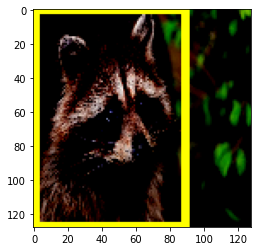

In [173]:
import matplotlib.pyplot as plt
plt.imshow(batch_images[1])
rect = cv2.rectangle(batch_images[1],coords[1],(150,140,0),4)
plt.imshow(rect)

### Import MobileNet and load MobileNet into a variable named 'model' which takes input shape of 128 * 128 * 3. Freeze all the layers. Add convolution and reshape layers at the end to ensure the output is 4 coordinates

In [87]:
model = MobileNet(input_shape=(Image_Size,Image_Size,3),include_top=False,weights='imagenet')

17227776/17225924 [==============================] - 0s 0us/step


In [88]:
 for layer in model.layers:
        print(layer.name,layer.trainable)

input_1 True
conv1_pad True
conv1 True
conv1_bn True
conv1_relu True
conv_dw_1 True
conv_dw_1_bn True
conv_dw_1_relu True
conv_pw_1 True
conv_pw_1_bn True
conv_pw_1_relu True
conv_pad_2 True
conv_dw_2 True
conv_dw_2_bn True
conv_dw_2_relu True
conv_pw_2 True
conv_pw_2_bn True
conv_pw_2_relu True
conv_dw_3 True
conv_dw_3_bn True
conv_dw_3_relu True
conv_pw_3 True
conv_pw_3_bn True
conv_pw_3_relu True
conv_pad_4 True
conv_dw_4 True
conv_dw_4_bn True
conv_dw_4_relu True
conv_pw_4 True
conv_pw_4_bn True
conv_pw_4_relu True
conv_dw_5 True
conv_dw_5_bn True
conv_dw_5_relu True
conv_pw_5 True
conv_pw_5_bn True
conv_pw_5_relu True
conv_pad_6 True
conv_dw_6 True
conv_dw_6_bn True
conv_dw_6_relu True
conv_pw_6 True
conv_pw_6_bn True
conv_pw_6_relu True
conv_dw_7 True
conv_dw_7_bn True
conv_dw_7_relu True
conv_pw_7 True
conv_pw_7_bn True
conv_pw_7_relu True
conv_dw_8 True
conv_dw_8_bn True
conv_dw_8_relu True
conv_pw_8 True
conv_pw_8_bn True
conv_pw_8_relu True
conv_dw_9 True
conv_dw_9_bn True
co

In [109]:
from tensorflow.keras.layers import Conv2D,Reshape
x = model.layers[-1].output
x = Conv2D(4,(4,4))(x)
x = Reshape((4,))(x)

In [110]:
from tensorflow.keras.models import Model
fn_mod = Model(inputs=model.input, outputs=x)

### Define a custom loss function IoU which calculates Intersection Over Union

In [122]:
import tensorflow as tf
from tensorflow.keras.backend import epsilon
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.compat.v1.py_func(loss, [y_true, y_pred], tf.float32)
    return iou

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

In [128]:
fn_mod.compile(optimizer='adam',loss='mse',metrics=[IoU])

In [129]:
fn_mod.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)       

In [114]:
from tensorflow.keras.callbacks import *

In [115]:
es= EarlyStopping(monitor='IoU',patience=6)
rlrp = ReduceLROnPlateau(monitor='IoU',factor=0.2,patience=2)

In [130]:
fn_mod.fit(batch_images,coords,batch_size=32,epochs=30,callbacks=[es,rlrp])

Epoch 1/30
6/6 [==============================] - 0s 53ms/step - loss: 232.4914 - IoU: 0.6262
Epoch 2/30
6/6 [==============================] - 0s 45ms/step - loss: 246.5718 - IoU: 0.6280
Epoch 3/30
6/6 [==============================] - 0s 45ms/step - loss: 153.7142 - IoU: 0.6749
Epoch 4/30
6/6 [==============================] - 0s 46ms/step - loss: 98.6755 - IoU: 0.7435
Epoch 5/30
6/6 [==============================] - 0s 46ms/step - loss: 84.5149 - IoU: 0.7715
Epoch 6/30
6/6 [==============================] - 0s 45ms/step - loss: 71.5439 - IoU: 0.7850
Epoch 7/30
6/6 [==============================] - 0s 45ms/step - loss: 69.0274 - IoU: 0.7901


In [131]:
fn_mod.fit(batch_images,coords,batch_size=32,epochs=30,callbacks=[rlrp])

Epoch 1/30
6/6 [==============================] - 0s 54ms/step - loss: 65.8374 - IoU: 0.8118
Epoch 2/30
6/6 [==============================] - 0s 45ms/step - loss: 67.1134 - IoU: 0.8051
Epoch 3/30
6/6 [==============================] - 0s 44ms/step - loss: 64.9008 - IoU: 0.8041
Epoch 4/30
6/6 [==============================] - 0s 45ms/step - loss: 61.9863 - IoU: 0.8127
Epoch 5/30
6/6 [==============================] - 0s 45ms/step - loss: 62.3645 - IoU: 0.8086
Epoch 6/30
6/6 [==============================] - 0s 44ms/step - loss: 68.9913 - IoU: 0.7808
Epoch 7/30
6/6 [==============================] - 0s 45ms/step - loss: 61.2705 - IoU: 0.8118
Epoch 8/30
6/6 [==============================] - 0s 46ms/step - loss: 65.2790 - IoU: 0.8027
Epoch 9/30
6/6 [==============================] - 0s 45ms/step - loss: 64.9870 - IoU: 0.8015
Epoch 10/30
6/6 [==============================] - 0s 45ms/step - loss: 65.7324 - IoU: 0.7964
Epoch 11/30
6/6 [==============================] - 0s 44ms/step - los

### Pick a test image from the given data

In [166]:
filename = './images/raccoon-19.jpg'
unsc = cv2.imread(filename)

### Resize the image to 128 * 128 and preprocess the image for the MobileNet model

In [167]:
#print(unsc)
sc = cv2.resize(unsc,(Image_Size,Image_Size))
#print(sc.shape)
scclr = cv2.cvtColor(sc,cv2.COLOR_BGR2RGB)
presc = preprocess_input(scclr)

### Predict the coordinates of the bounding box for the given test image

In [168]:
region = fn_mod.predict(x=np.array([presc]))[0]  # Predict the BBox

In [169]:
region

array([38.54189,  4.08582, 89.24704, 68.35377], dtype=float32)

### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

Rectangle(xy=(82, 5), width=109, height=92, angle=0)


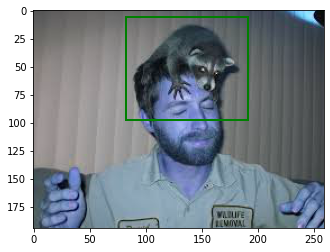

In [175]:
x0 = int(region[0] * w / Image_Size) # Scale the BBox
y0 = int(region[1] * h / Image_Size)

x1 = int((region[2]) * w / Image_Size)
y1 = int((region[3]) * h / Image_Size)


import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unsc)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) ,linewidth=2,edgecolor='g',facecolor='none')

print(rect)
# Add the patch to the Axes
ax.add_patch(rect)

plt.show()